In [1]:
print("DATA 205")

DATA 205


In [1]:
#Importing packages

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Getting working directory

working_directory = os.getcwd()
print(working_directory)

/Users/rohingarg/DATA205CAPSTONE


In [8]:
#Pulling in the "Police Dispatched Incidents" dataset from Data Montgomery

url_pdi = "https://data.montgomerycountymd.gov/api/views/98cc-bc7d/rows.csv?accessType=DOWNLOAD"
df_pdi = pd.read_csv(url_pdi)
df_pdi.head()

/Users/rohingarg/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Incident_ID,Crime Reports,Crash Reports,Start Time,End Time,Priority,Initial Type,Close Type,Address,City,...,PRA,CallTime CallRoute,Calltime Dispatch,Calltime Arrive,Calltime Cleared,CallRoute Dispatch,Dispatch Arrive,Arrive Cleared,Disposition Desc,Location
0,P1900099420,190014036,NaN,03/26/2019 07:37:19 PM,03/26/2019 08:40:41 PM,4,THEFT/LARCENY - OCCURRED EARLIER,THEFT/LARCENY - OCCURRED EARLIER,4600 BLK EDGEFIELD RD,BETHESDA,...,183,126,405,906,3801,278,501,2894,LARCENYOTHEROVER$200,POINT (-77.0914 39.0187)
1,P1900281711,190040608,NaN,08/25/2019 01:01:36 AM,08/25/2019 01:49:12 AM,1,"MISSING, RUNAWAY, FOUND PERSON","MISSING, RUNAWAY, FOUND PERSON",9500 BLK HORIZON RUN RD,MONTGOMERY VILLAGE,...,505,448,669,852,2855,220,182,2003,JUVENILERUNAWAY,POINT (-77.1962 39.1578)
2,P1900027078,190003827,NaN,01/24/2019 05:38:00 PM,01/24/2019 10:41:53 PM,3,INDECENCY/LEWDNESS - OCCURRED EARLIER,INDECENCY/LEWDNESS - OCCURRED EARLIER,400 BLK W DIAMOND AVE,GAITHERSBURG,...,429,341,370,4413,18232,29,4042,13819,SEXOFFNS-INDECNTEXPOSR,POINT (-77.2095 39.1405)
3,P1900366994,190053313,NaN,11/05/2019 02:43:58 PM,11/05/2019 04:56:51 PM,4,FRAUD/DECEPTION - OCCURRED EARLIER,FRAUD/DECEPTION - OCCURRED EARLIER,10400 BLK AUTO PARK AVE,BETHESDA,...,520,163,5597,6624,7973,5434,1026,1348,FORGERY/CNTRFT-CHECKS,POINT (-77.1447 39.0272)
4,P1900219122,NaN,NaN,07/01/2019 11:35:38 PM,07/01/2019 11:49:08 PM,0,DOMESTIC DISTURBANCE/VIOLENCE,DOMESTIC DISTURBANCE/VIOLENCE,18800 BLK NATHANS PL,MONTGOMERY VILLAGE,...,505,162,200,396,810,38,195,413,FAMILYTROUBLE,POINT (-77.2012 39.1609)


In [9]:
#Removing the Scientific Notation from the data. For example, changes ZIP Codes from 2.1e4 to 20851

pd.options.display.float_format = '{:.0f}'.format

#Also, removing unnecessary columns

del df_pdi['Police District Number']
del df_pdi['Beat']
del df_pdi['PRA']
del df_pdi['Crime Reports']
del df_pdi['Incident_ID']
del df_pdi['Disposition Desc']
del df_pdi['CallRoute Dispatch']
del df_pdi['Arrive Cleared']
del df_pdi['Calltime Cleared']
del df_pdi['Address']
del df_pdi['Close Type']
del df_pdi['Crash Reports']
del df_pdi['Longitude']
del df_pdi['Latitude']

df_pdi.head()

,Start Time,End Time,Priority,Initial Type,City,State,Zip,CallTime CallRoute,Calltime Dispatch,Calltime Arrive,Dispatch Arrive,Location
0,03/26/2019 07:37:19 PM,03/26/2019 08:40:41 PM,4,THEFT/LARCENY - OCCURRED EARLIER,BETHESDA,MD,20814,126,405,906,501,POINT (-77.0914 39.0187)
1,08/25/2019 01:01:36 AM,08/25/2019 01:49:12 AM,1,"MISSING, RUNAWAY, FOUND PERSON",MONTGOMERY VILLAGE,MD,20886,448,669,852,182,POINT (-77.1962 39.1578)
2,01/24/2019 05:38:00 PM,01/24/2019 10:41:53 PM,3,INDECENCY/LEWDNESS - OCCURRED EARLIER,GAITHERSBURG,MD,20877,341,370,4413,4042,POINT (-77.2095 39.1405)
3,11/05/2019 02:43:58 PM,11/05/2019 04:56:51 PM,4,FRAUD/DECEPTION - OCCURRED EARLIER,BETHESDA,MD,20817,163,5597,6624,1026,POINT (-77.1447 39.0272)
4,07/01/2019 11:35:38 PM,07/01/2019 11:49:08 PM,0,DOMESTIC DISTURBANCE/VIOLENCE,MONTGOMERY VILLAGE,MD,20886,162,200,396,195,POINT (-77.2012 39.1609)


In [119]:
df_pdi["YEAR"] = df_pdi["Start Time"].map(lambda x: "2021" if "2021" in x 
                                          else "2020" if "2020" in x 
                                          else "2019" if "2019" in x
                                          else "2018" if "2018" in x
                                          else "2017" if "2017" in x
                                          else "")

In [120]:
# Pulling in the "Crime Reporting Incidents" dataset from Data Montgomery

url_cri = "https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD"
df_cri = pd.read_csv(url_cri)

del df_cri['Report Number']
del df_cri['Local Case Number']
del df_cri['Junction']
del df_cri['Intersection Type']
del df_cri['Off-Road Description']
del df_cri['Collision Type']
del df_cri['Latitude']
del df_cri['Longitude']
del df_cri['Location']


df_cri.head()

/Users/rohingarg/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,NonTraffic,Road Name,Cross-Street Type,Cross-Street Name,Municipality,Related Non-Motorist,At Fault,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Intersection Area,Road Alignment,Road Condition,Road Division
0,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,DRIVER,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER,NaN,BUILDING,NaN,NaN,NaN,NaN
1,Gaithersburg Police Depar,Property Damage Crash,05/02/2020 02:16:00 PM,Yes,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,DRIVER,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,NaN,PARKED VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN
2,Montgomery County Police,Injury Crash,09/15/2020 03:33:00 PM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,DRIVER,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NaN,NaN,OTHER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN
3,Maryland-National Capital,Property Damage Crash,10/14/2020 08:40:00 AM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,DAYLIGHT,NaN,NaN,NaN,UNITS SEPARATED,NaN,NaN,NaN,NaN,NaN,NaN
4,Montgomery County Police,Property Damage Crash,03/03/2020 09:19:00 AM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,DRIVER,CLOUDY,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER OBJECT,NaN,OTHER,NaN,NaN,NaN,NaN


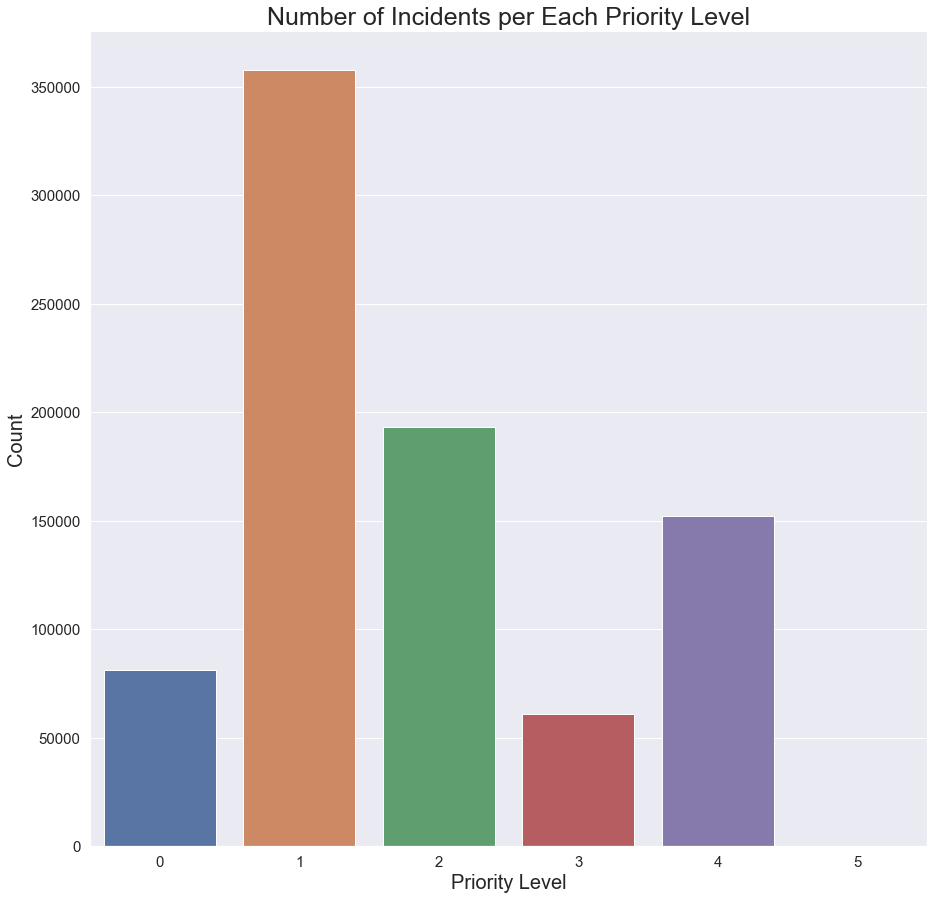

In [198]:
#Determining the frequency of incidents relating to their priority level

sns.countplot(x = df_pdi.Priority)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Number of Incidents per Each Priority Level', fontsize = 25)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Priority Level', fontsize = 20)
plt.show()

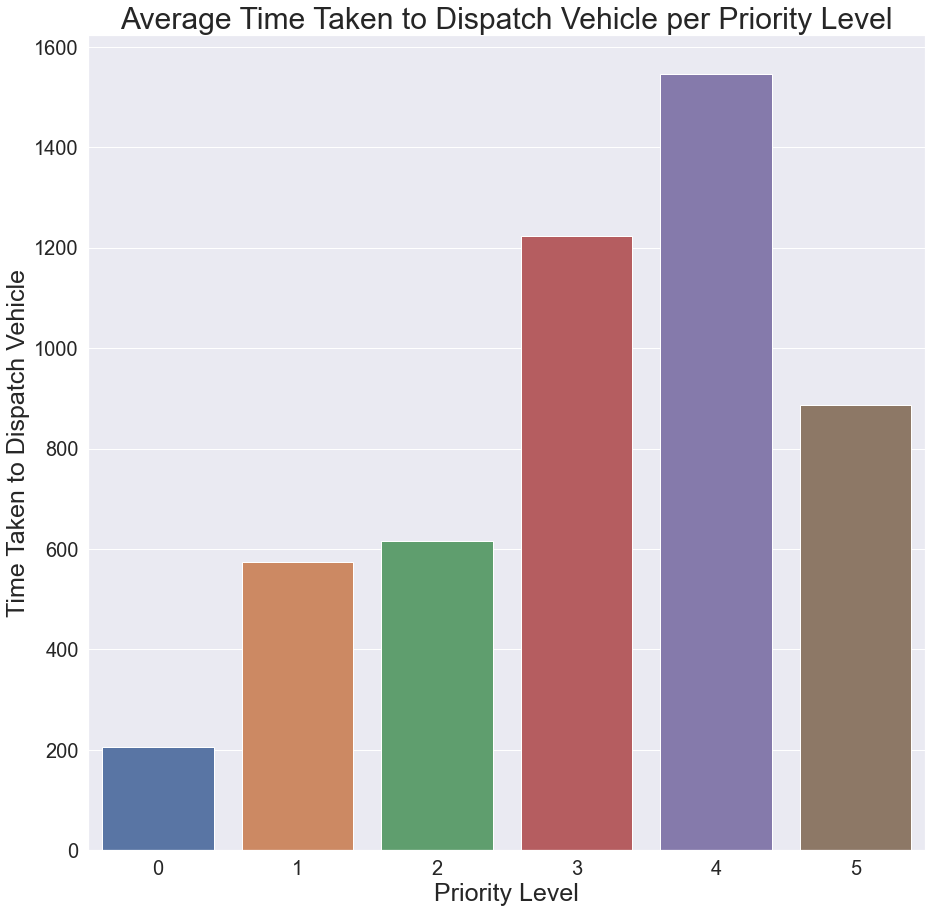

In [199]:
#Bar graph displaying the average dispatch time per priority level
# 0 is the highest priority and 5 is the lowest priority

prioritylevels = df_pdi.groupby(['Priority']).mean()
sns.barplot(x= prioritylevels.index, y = 'Calltime Dispatch', data = prioritylevels)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Average Time Taken to Dispatch Vehicle per Priority Level', fontsize = 30)
plt.ylabel('Time Taken to Dispatch Vehicle', fontsize = 25)
plt.xlabel('Priority Level', fontsize = 25)
plt.show()

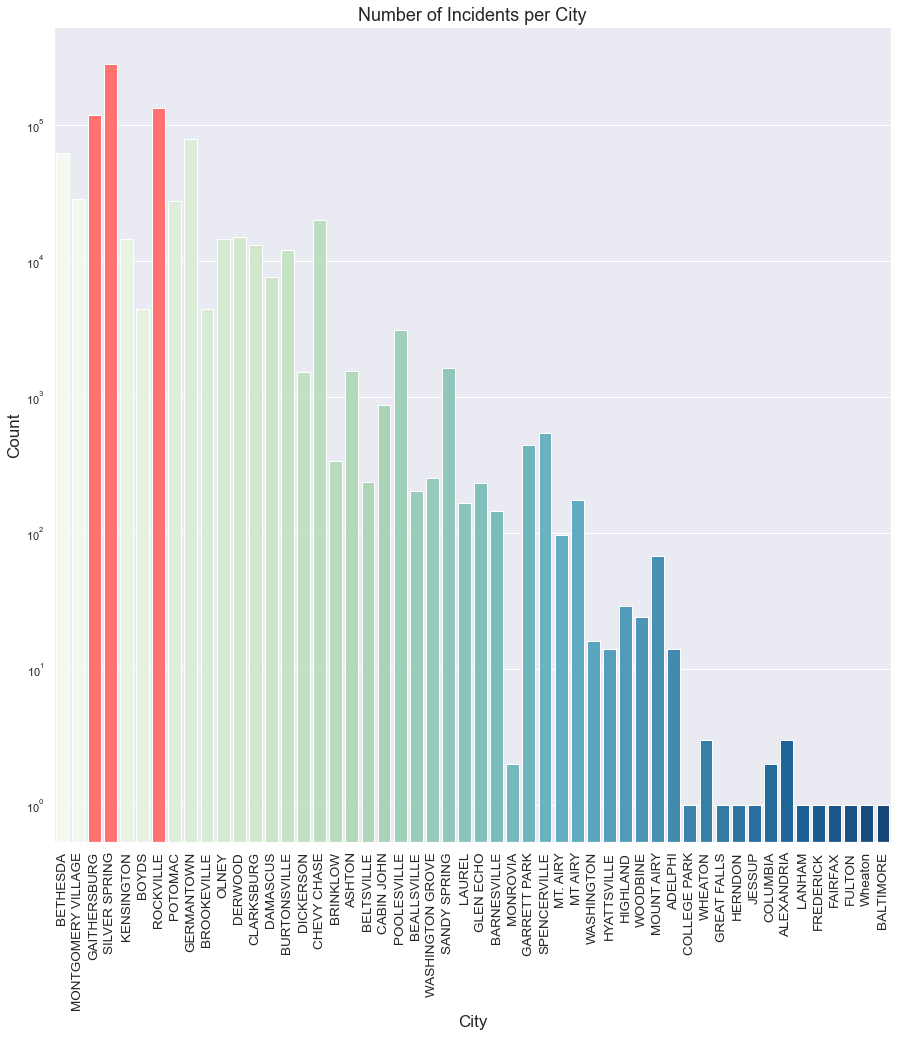

In [123]:
#Bar graph illustrating the frequncy of incidents in each city
# Y-Axis is log-scaled

sns.set(rc = {'figure.figsize': (15,15)})
freq = sns.countplot(x = 'City', data = df_pdi, palette = "GnBu")
freq.set_xticklabels(freq.get_xticklabels(), rotation = 90, fontsize = 13.5)
freq.set(yscale="log")
freq.patches[3].set_facecolor('#FF726f') 
freq.patches[2].set_facecolor('#FF726f') 
freq.patches[6].set_facecolor('#FF726f') 
plt.title('Number of Incidents per City', fontsize = 18)
plt.ylabel('Count', fontsize = 17)
plt.xlabel('City', fontsize = 17)
plt.show()

In [124]:
# Creating new dataset only containing the top 3 cities with the most incidents
# Silver Spring, Rockville, and Gaithersburg

common_cities = df_pdi[(df_pdi.City == 'SILVER SPRING') | (df_pdi.City == 'ROCKVILLE') | (df_pdi.City == 'GAITHERSBURG')]
common_cities.head()

,Start Time,End Time,Priority,Type,City,State,Zip,CallTime CallRoute,Calltime Dispatch,Calltime Arrive,Dispatch Arrive,Location,YEAR
2,01/24/2019 05:38:00 PM,01/24/2019 10:41:53 PM,3,INDECENCY/LEWDNESS - OCCURRED EARLIER,GAITHERSBURG,MD,20877.00000000,341.00000000,370.00000000,4413.00000000,4042.00000000,POINT (-77.2095 39.1405),2019
5,07/02/2019 11:31:38 PM,07/03/2019 12:07:44 AM,1,"SUSPICIOUS CIRC, PERSONS, VEHICLE",SILVER SPRING,MD,20904.00000000,308.00000000,350.00000000,697.00000000,346.00000000,POINT (-76.9518 39.0508),2019
10,07/05/2019 11:35:59 PM,07/06/2019 12:08:18 AM,3,NOISE - NOISE - OTHER COMPLAINTS,SILVER SPRING,MD,20906.00000000,57.00000000,894.00000000,1596.00000000,702.00000000,POINT (-77.0654 39.0857),2019
11,07/06/2019 11:31:58 PM,07/06/2019 11:39:48 PM,2,TRAFFIC VIOLATION,SILVER SPRING,MD,20904.00000000,247.00000000,408.00000000,nan,nan,POINT (-77.002 39.0757),2019
12,07/07/2019 11:34:06 PM,07/08/2019 12:26:39 AM,4,PARKING OFFENSE,ROCKVILLE,MD,20852.00000000,134.00000000,2091.00000000,2834.00000000,742.00000000,POINT (-77.1202 39.0542),2019


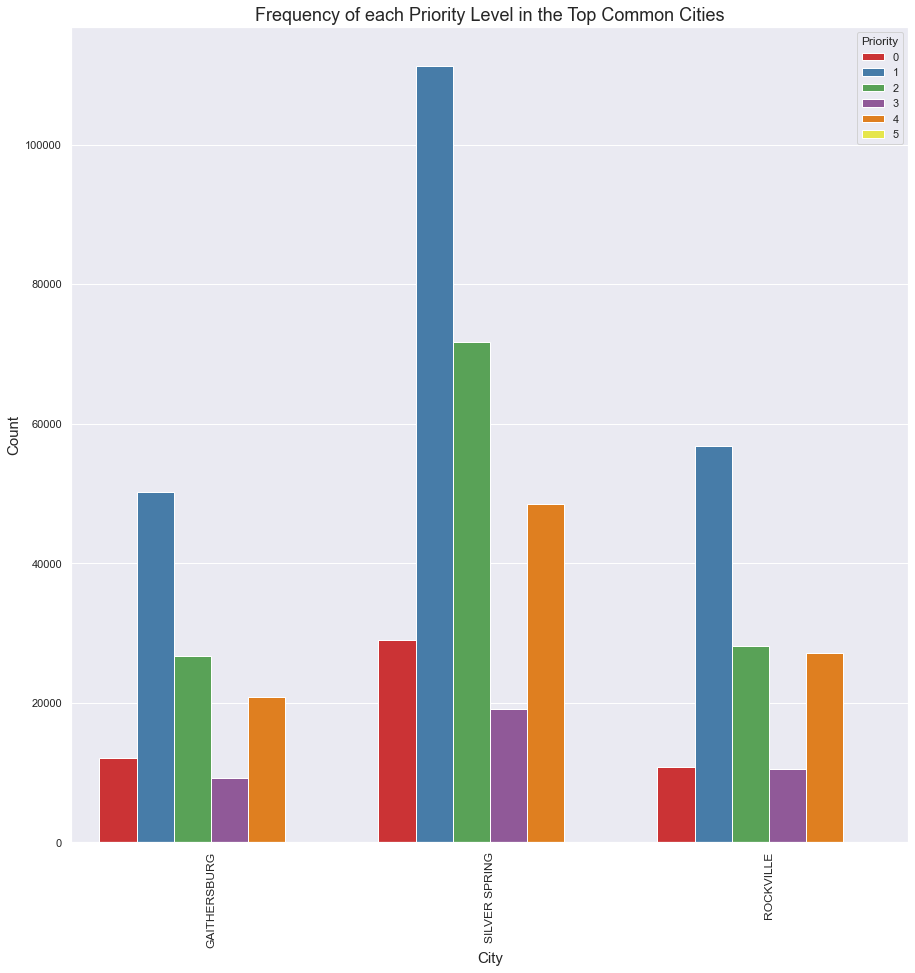

In [125]:
#Grouped bar graph depicting the frequency of each priority level in the cities with the highest incidents

sns.countplot(x = "City", hue = "Priority", data = common_cities, palette = "Set1")
plt.xticks(fontsize = 12, rotation = 90)
plt.title('Frequency of each Priority Level in the Top Common Cities', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.show()

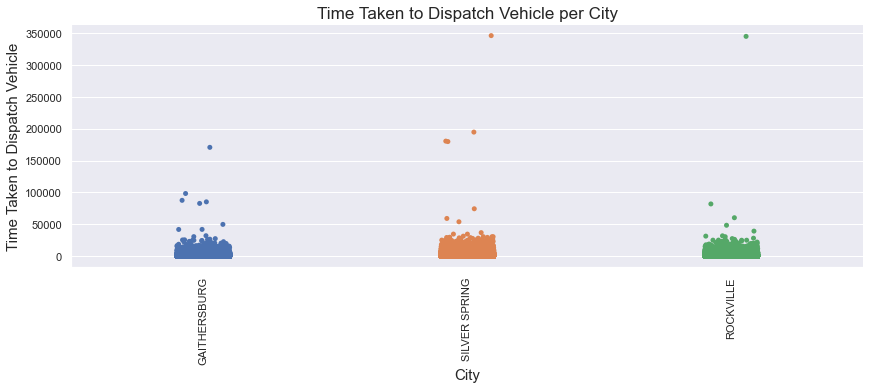

In [126]:
# Showing which the time taken to dispatch a vehicle for the three most common cities

sns.set(rc = {'figure.figsize': (15,15)})
citydispatch = sns.catplot(x='City', y = 'Calltime Dispatch', jitter = True, data = common_cities, height = 4, aspect = 3)
citydispatch.set_xticklabels(rotation = 90)
plt.title('Time Taken to Dispatch Vehicle per City', fontsize = 17)
plt.ylabel('Time Taken to Dispatch Vehicle', fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.show()

In [127]:
# Creating new dataframe to further analyze dispatch time

common_dispatch = common_cities
common_dispatch.rename(columns={'Calltime Dispatch':'DispatchTime'}, inplace=True)
common_dispatch = common_dispatch[(common_dispatch.DispatchTime <= 10000)]
common_dispatch.head()

/Users/rohingarg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Start Time,End Time,Priority,Type,City,State,Zip,CallTime CallRoute,DispatchTime,Calltime Arrive,Dispatch Arrive,Location,YEAR
2,01/24/2019 05:38:00 PM,01/24/2019 10:41:53 PM,3,INDECENCY/LEWDNESS - OCCURRED EARLIER,GAITHERSBURG,MD,20877.00000000,341.00000000,370.00000000,4413.00000000,4042.00000000,POINT (-77.2095 39.1405),2019
5,07/02/2019 11:31:38 PM,07/03/2019 12:07:44 AM,1,"SUSPICIOUS CIRC, PERSONS, VEHICLE",SILVER SPRING,MD,20904.00000000,308.00000000,350.00000000,697.00000000,346.00000000,POINT (-76.9518 39.0508),2019
10,07/05/2019 11:35:59 PM,07/06/2019 12:08:18 AM,3,NOISE - NOISE - OTHER COMPLAINTS,SILVER SPRING,MD,20906.00000000,57.00000000,894.00000000,1596.00000000,702.00000000,POINT (-77.0654 39.0857),2019
11,07/06/2019 11:31:58 PM,07/06/2019 11:39:48 PM,2,TRAFFIC VIOLATION,SILVER SPRING,MD,20904.00000000,247.00000000,408.00000000,nan,nan,POINT (-77.002 39.0757),2019
12,07/07/2019 11:34:06 PM,07/08/2019 12:26:39 AM,4,PARKING OFFENSE,ROCKVILLE,MD,20852.00000000,134.00000000,2091.00000000,2834.00000000,742.00000000,POINT (-77.1202 39.0542),2019


<ipython-input-128-23131cf4a4af>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)


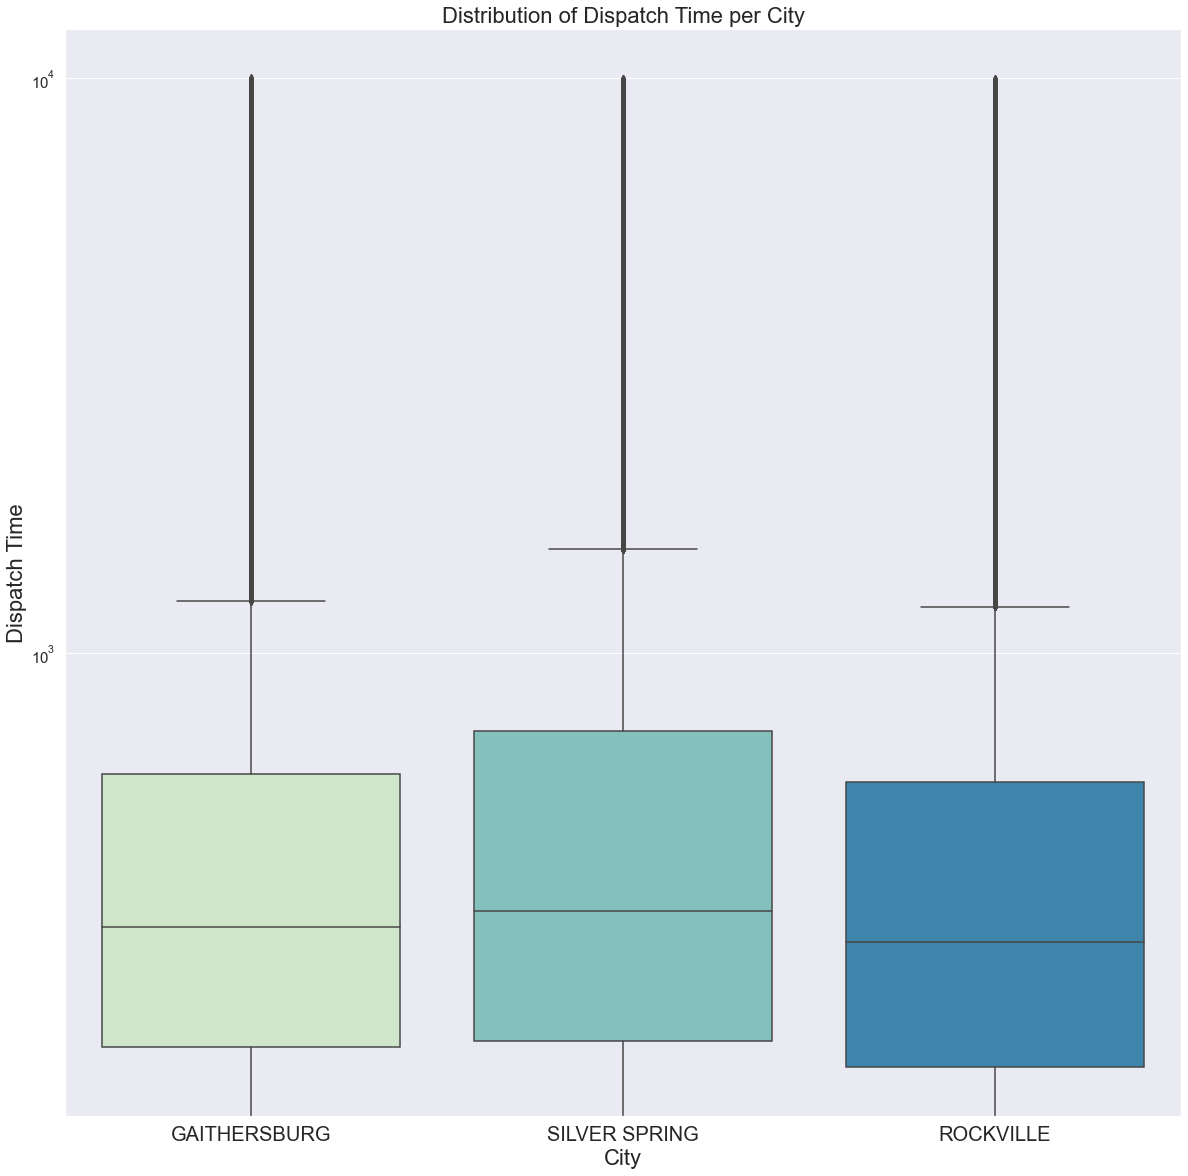

In [128]:
# Boxplots showing the distribution of dispatch time in the three common cities
# Y-Axis is log scaled

sns.set(rc = {'figure.figsize': (20,20)})
ax = sns.boxplot(x='City', y='DispatchTime', data=common_dispatch, palette = "GnBu")
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)
ax.set(yscale = "log")
plt.title('Distribution of Dispatch Time per City', fontsize = 22)
plt.ylabel('Dispatch Time', fontsize = 22)
plt.xlabel('City', fontsize = 22)
plt.show()

In [129]:
# Importing packages

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [130]:
com_cit_contingency = pd.crosstab(common_cities['City'], common_cities['Priority'])
com_cit_contingency

Priority,0,1,2,3,4,5
City,,,,,,
GAITHERSBURG,12003,50161,26620,9130,20808,0
ROCKVILLE,10708,56741,28091,10546,27091,1
SILVER SPRING,28988,111313,71675,19158,48518,1


In [131]:
df_no5 = common_cities[(common_cities.Priority < 5)]
com_cit_contingency = pd.crosstab(df_no5['City'], df_no5['Priority'])
com_cit_contingency

Priority,0,1,2,3,4
City,,,,,
GAITHERSBURG,12003,50161,26620,9130,20808
ROCKVILLE,10708,56741,28091,10546,27091
SILVER SPRING,28988,111313,71675,19158,48518


In [132]:
chi2_contingency(com_cit_contingency)

(2298.5392768420916,
 0.0,
 8,
 array([[ 11546.97983448,  48738.35479568,  28228.33310821,
           8673.58004782,  21534.7522138 ],
        [ 12952.88264532,  54672.49437025,  31665.27449295,
           9729.63199768,  24156.71649381],
        [ 27199.1375202 , 114804.15083407,  66492.39239885,
          20430.7879545 ,  50725.53129239]]))

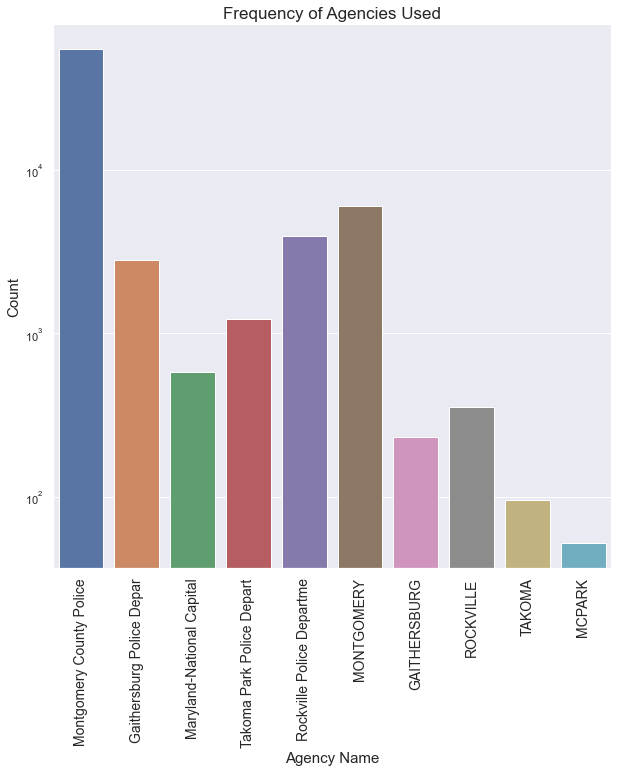

In [133]:
# Showing which agencies are most commonly used
# Y-axis is log-scaled

sns.set(rc = {'figure.figsize': (10,10)})
freq = sns.countplot( x= 'Agency Name', data = df_cri)
freq.set_xticklabels(freq.get_xticklabels(), rotation = 90, fontsize = 14freq.set(yscale="log")freq.set(yscale="log"))
freq.set(yscale="log")
plt.title('Frequency of Agencies Used', fontsize = 17)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Agency Name', fontsize = 15)
plt.show()

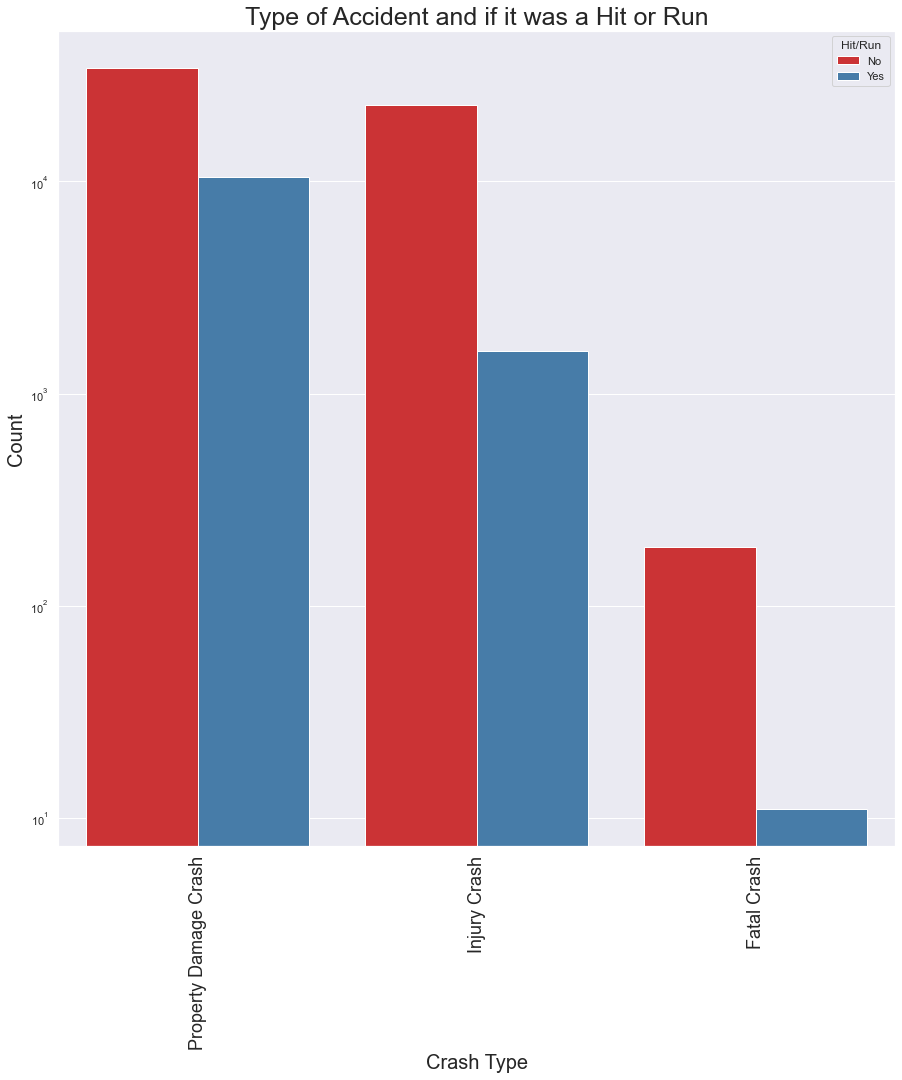

In [206]:
# Determing wheter hit or runs are common for certain accidents

g = sns.countplot(x = "ACRS Report Type", hue = "Hit/Run", data = df_cri, palette = "Set1")
g.set(yscale = "log")
plt.xticks(rotation = 90, fontsize = 18)
plt.title('Type of Accident and if it was a Hit or Run', fontsize = 25)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Crash Type', fontsize = 20)
plt.show()

In [135]:
# Creating new dataframe called "suicides" only containing incidents related to suicide

df_pdi.rename(columns={'Initial Type':'Type'}, inplace=True)
suicides = df_pdi[(df_pdi.Type == 'SUICIDAL PERSON/ATTEMPTED SUICIDE')]
suicides.head()

,Start Time,End Time,Priority,Type,City,State,Zip,CallTime CallRoute,Calltime Dispatch,Calltime Arrive,Dispatch Arrive,Location,YEAR
45,06/12/2019 03:33:19 PM,06/12/2019 05:16:41 PM,1,SUICIDAL PERSON/ATTEMPTED SUICIDE,SILVER SPRING,MD,20910.00000000,178.00000000,323.00000000,1145.00000000,822.00000000,POINT (-77.0296 38.987),2019
283,08/04/2019 10:18:10 PM,08/04/2019 11:39:45 PM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,SILVER SPRING,MD,20904.00000000,354.00000000,399.00000000,595.00000000,195.00000000,POINT (-76.9851 39.0416),2019
355,08/05/2019 12:15:56 AM,08/05/2019 12:49:40 AM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,BROOKEVILLE,MD,20833.00000000,84.00000000,132.00000000,604.00000000,472.00000000,POINT (-77.0634 39.1716),2019
406,08/05/2019 02:14:05 AM,08/05/2019 02:42:58 AM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,MONTGOMERY VILLAGE,MD,20886.00000000,230.00000000,297.00000000,543.00000000,246.00000000,POINT (-77.2025 39.1753),2019
424,08/05/2019 04:35:18 AM,08/05/2019 05:10:54 AM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,ROCKVILLE,MD,20850.00000000,123.00000000,173.00000000,476.00000000,302.00000000,POINT (-77.1306 39.0944),2019


In [136]:
# Creating another dataframe grouping the suicidal incidents by their ZIP Code

ZIP_Suicides = suicides.groupby(["Zip", "City"], as_index=False)["Type"].count()
ZIP_Suicides.rename(columns={'Type':'# of Suicidal Incidents'}, inplace=True)
ZIP_Suicides.rename(columns={'Zip':'ZIP_Code'}, inplace=True)
pd.options.display.float_format = '{:.0f}'.format
ZIP_Suicides.head(20)

,ZIP_Code,City,# of Suicidal Incidents
0,20007,SILVER SPRING,1
1,20012,SILVER SPRING,1
2,20012,WASHINGTON,1
3,20032,BOYDS,1
4,20037,SILVER SPRING,1
5,20132,ROCKVILLE,1
6,20190,GAITHERSBURG,1
7,20613,SILVER SPRING,1
8,20705,BELTSVILLE,3
9,20705,MONTGOMERY VILLAGE,1


In [137]:
# Pulling in data from Maryland's website containing data about each ZIP code such as population and demographics

url_md = "https://opendata.arcgis.com/datasets/eb706b48117b43d482c63d02017fc3ff_1.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
df_md = pd.read_csv(url_md)
df_md.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P
0,1,20601,24,2420601,B5,G6350,S,20601,24,115635266,387684,24156,8722,9785,11146,155,880,11,48,849,1282,40,46,1,4,0,0,4,5,1922,8,37,376,4,71,11,20,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
1,2,20602,24,2420602,B5,G6350,S,20602,24,35830723,352762,24955,9736,8466,13054,116,731,15,58,999,1516,34,52,0,3,0,0,4,6,1964,8,33,769,8,60,9,34,44,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
2,3,20603,24,2420603,B5,G6350,S,20603,24,44239637,219356,28967,10317,9625,15025,98,1446,24,65,1091,1593,33,52,0,5,0,0,4,6,1400,5,34,531,5,74,5,23,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
3,4,20606,24,2420606,B5,G6350,S,20606,24,7501011,1248760,431,230,377,45,1,4,0,0,0,4,88,10,0,1,0,0,0,1,108,25,49,15,6,50,39,18,31,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
4,5,20607,24,2420607,B5,G6350,S,20607,24,54357590,448221,9802,3504,2165,6321,33,560,3,6,234,480,22,64,0,6,0,0,2,5,847,9,41,172,5,83,10,7,22,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...


In [138]:
# Function allowing me to see all the variables in the dataset

pd.set_option('display.max_columns', None)
df_md.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P
0,1,20601,24,2420601,B5,G6350,S,20601,24,115635266,387684,24156,8722,9785,11146,155,880,11,48,849,1282,40,46,1,4,0,0,4,5,1922,8,37,376,4,71,11,20,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
1,2,20602,24,2420602,B5,G6350,S,20602,24,35830723,352762,24955,9736,8466,13054,116,731,15,58,999,1516,34,52,0,3,0,0,4,6,1964,8,33,769,8,60,9,34,44,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
2,3,20603,24,2420603,B5,G6350,S,20603,24,44239637,219356,28967,10317,9625,15025,98,1446,24,65,1091,1593,33,52,0,5,0,0,4,6,1400,5,34,531,5,74,5,23,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
3,4,20606,24,2420606,B5,G6350,S,20606,24,7501011,1248760,431,230,377,45,1,4,0,0,0,4,88,10,0,1,0,0,0,1,108,25,49,15,6,50,39,18,31,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
4,5,20607,24,2420607,B5,G6350,S,20607,24,54357590,448221,9802,3504,2165,6321,33,560,3,6,234,480,22,64,0,6,0,0,2,5,847,9,41,172,5,83,10,7,22,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...


In [139]:
# Renaming variables from their respective codes to what they represent
# Creating another dataframe extracting the ZIP Code and Population from the MD census dataset

df_md.rename(columns={'ZCTA5N':'ZIP_Code'}, inplace=True)
df_md.rename(columns={'POP100':'Population'}, inplace=True)
ZIP_Populations = df_md[['ZIP_Code','Population']]

ZIP_Populations.head(15)

,ZIP_Code,Population
0,20601,24156
1,20602,24955
2,20603,28967
3,20606,431
4,20607,9802
5,20608,919
6,20609,1120
7,20611,1078
8,20612,261
9,20613,11860


In [140]:
print(ZIP_Populations)

     ZIP_Code  Population
0       20601       24156
1       20602       24955
2       20603       28967
3       20606         431
4       20607        9802
..        ...         ...
463     21918        4284
464     21919        3467
465     21920         257
466     21921       44471
467     21930          94

[468 rows x 2 columns]


In [141]:
print(ZIP_Suicides)

    ZIP_Code           City  # of Suicidal Incidents
0      20007  SILVER SPRING                        1
1      20012  SILVER SPRING                        1
2      20012     WASHINGTON                        1
3      20032          BOYDS                        1
4      20037  SILVER SPRING                        1
..       ...            ...                      ...
406    21044  SILVER SPRING                        1
407    21771     GERMANTOWN                        1
408    22102  SILVER SPRING                        1
409     FRED     KENSINGTON                        1
410       HO      ROCKVILLE                        1

[411 rows x 3 columns]


In [142]:
#Merging the two datasets together

ZIP_final = pd.merge(ZIP_Populations, ZIP_Suicides, on="ZIP_Code")
ZIP_final.head(20)

,ZIP_Code,Population,City,# of Suicidal Incidents
0,20613,11860,SILVER SPRING,1
1,20705,26188,BELTSVILLE,3
2,20705,26188,MONTGOMERY VILLAGE,1
3,20705,26188,SILVER SPRING,2
4,20706,38692,CHEVY CHASE,1
5,20707,31538,GAITHERSBURG,1
6,20707,31538,ROCKVILLE,1
7,20707,31538,SILVER SPRING,1
8,20708,25546,SILVER SPRING,1
9,20721,27016,ROCKVILLE,1


In [143]:
# Since the data is now merged, we can calculate the suicidal incident rate

ZIP_final['Suicidal_Incident_Rate'] = ZIP_final['# of Suicidal Incidents'] / ZIP_final['Population']
pd.options.display.float_format = '{:.08f}'.format
ZIP_final.head(20)

,ZIP_Code,Population,City,# of Suicidal Incidents,Suicidal_Incident_Rate
0,20613,11860,SILVER SPRING,1,0.00008432
1,20705,26188,BELTSVILLE,3,0.00011456
2,20705,26188,MONTGOMERY VILLAGE,1,0.00003819
3,20705,26188,SILVER SPRING,2,0.00007637
4,20706,38692,CHEVY CHASE,1,0.00002585
5,20707,31538,GAITHERSBURG,1,0.00003171
6,20707,31538,ROCKVILLE,1,0.00003171
7,20707,31538,SILVER SPRING,1,0.00003171
8,20708,25546,SILVER SPRING,1,0.00003915
9,20721,27016,ROCKVILLE,1,0.00003702


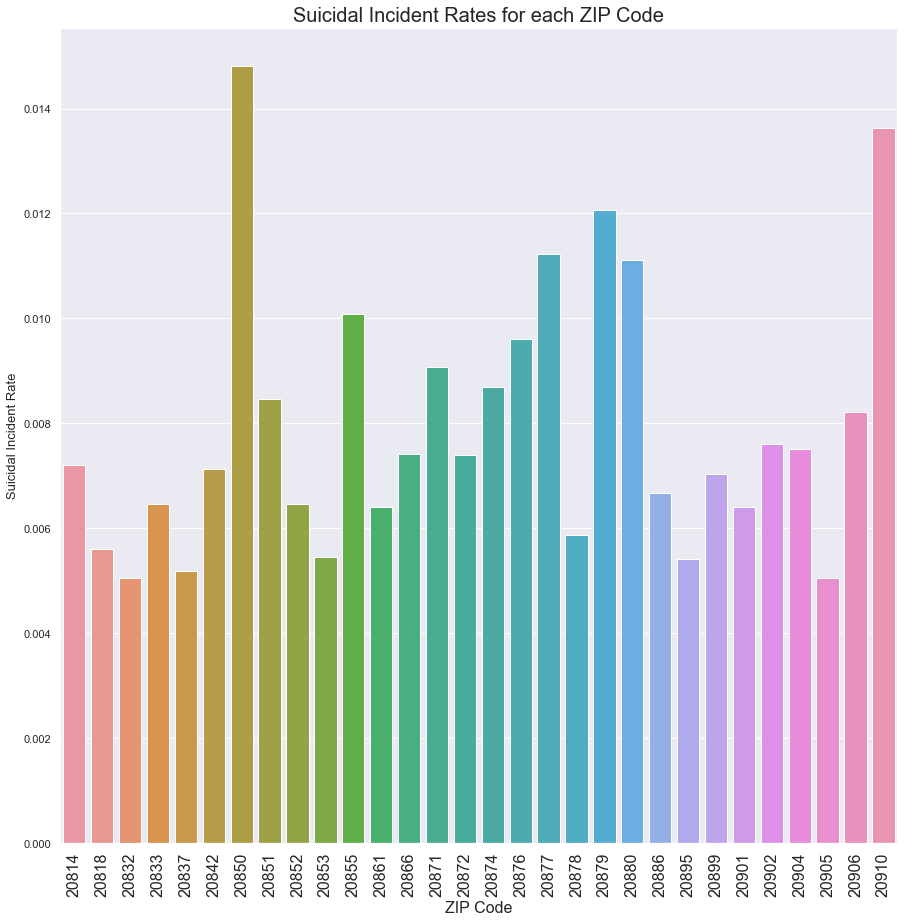

In [145]:
# Visualization showing which ZIP codes have the highest rate of Suicidal Incidents

# 1 - 20850 (Rockville)
# 2 - 20910 (Silver Spring/Takoma Park)
# 3 - 20879 (Gaithersburg)

ZIP_final_high = ZIP_final[(ZIP_final.Suicidal_Incident_Rate > 0.005)]
sns.barplot(x= 'ZIP_Code', y = 'Suicidal_Incident_Rate', data = ZIP_final_high, ci = None)
plt.xticks(rotation = 90, fontsize = "16")
plt.title('Suicidal Incident Rates for each ZIP Code', fontsize = 20)
plt.ylabel('Suicidal Incident Rate', fontsize = 13)
plt.xlabel('ZIP Code', fontsize = 16)
plt.show()

In [147]:
# Create table showing # of Suicidal Incidents per Year

YEAR_Suicides = suicides.groupby(["YEAR"], as_index=False)["Type"].count()
YEAR_Suicides.rename(columns={'Type':'# of Suicidal Incidents'}, inplace=True)
YEAR_Suicides.rename(columns={'Zip':'ZIP Code'}, inplace=True)
pd.options.display.float_format = '{:.0f}'.format
YEAR_Suicides.head()

,YEAR,# of Suicidal Incidents
0,2017,2046
1,2018,2554
2,2019,2338
3,2020,1421
4,2021,404


In [148]:
# Dropping 2021 because the year has not been completed

YEAR_Suicides.drop(labels = 4, axis = 0, inplace = True)
YEAR_Suicides.head()

,YEAR,# of Suicidal Incidents
0,2017,2046
1,2018,2554
2,2019,2338
3,2020,1421


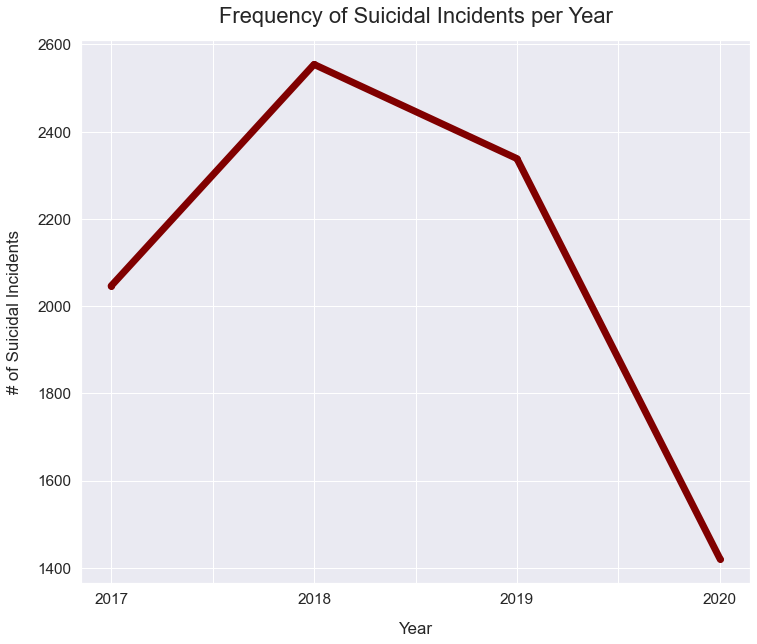

In [150]:
# Creating a line chart based off the table above

sns.set(font_scale=1.4)
YEAR_Suicides.set_index('YEAR')['# of Suicidal Incidents'].plot(figsize=(12, 10), linewidth=7, color='maroon', marker = "o")
plt.xlabel("Year", labelpad=15)
plt.ylabel("# of Suicidal Incidents", labelpad=15)
plt.title("Frequency of Suicidal Incidents per Year", y=1.02, fontsize=22);

In [151]:
# Import packages

import json
import requests as re

In [152]:
# Importing Census data

census_data = re.get('https://api.census.gov/data/2017/acs/acs5?get=NAME,group(B01001)&for=zip%20code%20tabulation%20area:*&in=state:24').json()
df = pd.DataFrame(census_data)
df.rename(columns = df.iloc[0], inplace = True)
df = df.iloc[1:].rename(columns = {'zip code tabulation area': 'ZIP_Code',
                                     'B01001_005E': 'M_10-14',
                                     'B01001_006E': 'M_15-17',
                                     'B01001_007E': 'M_18-19',
                                     'B01001_001E': 'Total_Population',
                                     'B01001_029E': 'F_10-14',
                                     'B01001_030E': 'F_15-17',
                                     'B01001_031E': 'F_18-19',
                                    })
df.head()

,NAME,Total_Population,B01001_001EA,B01001_001M,B01001_001MA,B01001_002E,B01001_002EA,B01001_002M,B01001_002MA,B01001_003E,B01001_003EA,B01001_003M,B01001_003MA,B01001_004E,B01001_004EA,B01001_004M,B01001_004MA,M_10-14,B01001_005EA,B01001_005M,B01001_005MA,M_15-17,B01001_006EA,B01001_006M,B01001_006MA,M_18-19,B01001_007EA,B01001_007M,B01001_007MA,B01001_008E,B01001_008EA,B01001_008M,B01001_008MA,B01001_009E,B01001_009EA,B01001_009M,B01001_009MA,B01001_010E,B01001_010EA,B01001_010M,B01001_010MA,B01001_011E,B01001_011EA,B01001_011M,B01001_011MA,B01001_012E,B01001_012EA,B01001_012M,B01001_012MA,B01001_013E,B01001_013EA,B01001_013M,B01001_013MA,B01001_014E,B01001_014EA,B01001_014M,B01001_014MA,B01001_015E,B01001_015EA,B01001_015M,B01001_015MA,B01001_016E,B01001_016EA,B01001_016M,B01001_016MA,B01001_017E,B01001_017EA,B01001_017M,B01001_017MA,B01001_018E,B01001_018EA,B01001_018M,B01001_018MA,B01001_019E,B01001_019EA,B01001_019M,B01001_019MA,B01001_020E,B01001_020EA,B01001_020M,B01001_020MA,B01001_021E,B01001_021EA,B01001_021M,B01001_021MA,B01001_022E,B01001_022EA,B01001_022M,B01001_022MA,B01001_023E,B01001_023EA,B01001_023M,B01001_023MA,B01001_024E,B01001_024EA,B01001_024M,B01001_024MA,B01001_025E,B01001_025EA,B01001_025M,B01001_025MA,B01001_026E,B01001_026EA,B01001_026M,B01001_026MA,B01001_027E,B01001_027EA,B01001_027M,B01001_027MA,B01001_028E,B01001_028EA,B01001_028M,B01001_028MA,F_10-14,B01001_029EA,B01001_029M,B01001_029MA,F_15-17,B01001_030EA,B01001_030M,B01001_030MA,F_18-19,B01001_031EA,B01001_031M,B01001_031MA,B01001_032E,B01001_032EA,B01001_032M,B01001_032MA,B01001_033E,B01001_033EA,B01001_033M,B01001_033MA,B01001_034E,B01001_034EA,B01001_034M,B01001_034MA,B01001_035E,B01001_035EA,B01001_035M,B01001_035MA,B01001_036E,B01001_036EA,B01001_036M,B01001_036MA,B01001_037E,B01001_037EA,B01001_037M,B01001_037MA,B01001_038E,B01001_038EA,B01001_038M,B01001_038MA,B01001_039E,B01001_039EA,B01001_039M,B01001_039MA,B01001_040E,B01001_040EA,B01001_040M,B01001_040MA,B01001_041E,B01001_041EA,B01001_041M,B01001_041MA,B01001_042E,B01001_042EA,B01001_042M,B01001_042MA,B01001_043E,B01001_043EA,B01001_043M,B01001_043MA,B01001_044E,B01001_044EA,B01001_044M,B01001_044MA,B01001_045E,B01001_045EA,B01001_045M,B01001_045MA,B01001_046E,B01001_046EA,B01001_046M,B01001_046MA,B01001_047E,B01001_047EA,B01001_047M,B01001_047MA,B01001_048E,B01001_048EA,B01001_048M,B01001_048MA,B01001_049E,B01001_049EA,B01001_049M,B01001_049MA,GEO_ID,NAME,state,ZIP_Code
1,ZCTA5 21701,36697,None,821,None,16932,None,597,None,759,None,188,None,820,None,158,None,1143,None,224,None,469,None,138,None,407,None,117,None,185,None,77,None,235,None,107,None,750,None,219,None,1228,None,187,None,1486,None,246,None,870,None,165,None,1311,None,211,None,1211,None,166,None,1194,None,206,None,1301,None,178,None,351,None,109,None,598,None,170,None,420,None,109,None,487,None,117,None,710,None,131,None,517,None,113,None,216,None,68,None,264,None,89,None,19765,None,622,None,951,None,175,None,867,None,191,None,1292,None,215,None,621,None,147,None,577,None,143,None,345,None,132,None,183,None,63,None,760,None,180,None,1731,None,257,None,1338,None,204,None,1027,None,201,None,1271,None,172,None,1484,None,183,None,1449,None,165,None,1365,None,190,None,504,None,128,None,624,None,132,None,492,None,112,None,498,None,108,None,882,None,151,None,555,None,124,None,356,None,90,None,593,None,128,None,8600000US21701,ZCTA5 21701,24,21701
2,ZCTA5 21702,41271,None,967,None,20123,None,781,None,1390,None,225,None,1152,None,224,None,1314,None,249,None,744,None,148,None,468,None,142,None,180,None,88,None,225,None,101,None,1180,None,327,None,1656,None,316,None,1617,None,256,None,1378,None,196,None,1182,None,225,None,1525,None,200,None,1542,None,234,None,1192,None,194,None,363,None,123,None,714,None,164,None,346,None,104,None,597,None,147,None,444,None,110,None,461,None,100,None,217,None,76,None,236,None,75,None,21148,None,675,None,1515,None,291,None,1261,None,246,None,1479,None,255,None,917,None,194,None,340,None,126,None

In [153]:
# Selecting the columns I need

c_f = df[['ZIP_Code', 'Total_Population',
                      'M_10-14', 'M_15-17', 'M_18-19', 
                      'F_10-14', 'F_15-17', 'F_18-19']]
c_f.head(10)

,ZIP_Code,Total_Population,M_10-14,M_15-17,M_18-19,F_10-14,F_15-17,F_18-19
1,21701,36697,1143,469,407,1292,621,577
2,21702,41271,1314,744,468,1479,917,340
3,21704,16076,791,462,234,782,382,131
4,21716,5097,162,116,83,131,165,55
5,21722,5712,227,236,104,121,83,139
6,21727,6741,101,191,385,100,122,542
7,20880,521,14,6,8,12,4,13
8,20903,26004,794,658,471,896,392,320
9,20611,1499,64,66,21,46,52,21
10,20616,6221,197,150,145,216,41,92


In [154]:
# Creating new column which shows the total people aged from 10-19 in each ZIP Code by adding up the males and females from 10-14, 15-17, 18-19

c_f = c_f.astype(float)
c_f['Total_10-19'] = (c_f['M_10-14'] + c_f['M_15-17'] + c_f['M_18-19'] + c_f['F_10-14'] + c_f['F_15-17'] + c_f['F_18-19'])
c_f.head()

,ZIP_Code,Total_Population,M_10-14,M_15-17,M_18-19,F_10-14,F_15-17,F_18-19,Total_10-19
1,21701,36697,1143,469,407,1292,621,577,4509
2,21702,41271,1314,744,468,1479,917,340,5262
3,21704,16076,791,462,234,782,382,131,2782
4,21716,5097,162,116,83,131,165,55,712
5,21722,5712,227,236,104,121,83,139,910


In [155]:
# Calculating the rate of people aged 10-19 in each ZIP code by dividing the total 10-19 year olds by the total population in each ZIP Code

c_f['10-19_Rate'] = c_f['Total_10-19'] / c_f['Total_Population']
pd.options.display.float_format = '{:.08f}'.format
pd.set_option('precision', 3)
c_f.round()
c_f.head()

,ZIP_Code,Total_Population,M_10-14,M_15-17,M_18-19,F_10-14,F_15-17,F_18-19,Total_10-19,10-19_Rate
1,21701.00000000,36697.00000000,1143.00000000,469.00000000,407.00000000,1292.00000000,621.00000000,577.00000000,4509.00000000,0.12287108
2,21702.00000000,41271.00000000,1314.00000000,744.00000000,468.00000000,1479.00000000,917.00000000,340.00000000,5262.00000000,0.12749873
3,21704.00000000,16076.00000000,791.00000000,462.00000000,234.00000000,782.00000000,382.00000000,131.00000000,2782.00000000,0.17305300
4,21716.00000000,5097.00000000,162.00000000,116.00000000,83.00000000,131.00000000,165.00000000,55.00000000,712.00000000,0.13969001
5,21722.00000000,5712.00000000,227.00000000,236.00000000,104.00000000,121.00000000,83.00000000,139.00000000,910.00000000,0.15931373


In [156]:
# Selecting only the ZIP Code and 10-19 Rate

census_filtered = c_f[['ZIP_Code', '10-19_Rate']]
census_filtered.head()

,ZIP_Code,10-19_Rate
1,21701.00000000,0.12287108
2,21702.00000000,0.12749873
3,21704.00000000,0.17305300
4,21716.00000000,0.13969001
5,21722.00000000,0.15931373


In [157]:
# Merging two datasets by ZIP Codes to have a singular dataset with the suicidal incident rate and 10-19 rate

ZIP_FINAL = pd.merge(ZIP_final, census_filtered, on="ZIP_Code")
ZIP_FINAL.head(20)

,ZIP_Code,Population,City,# of Suicidal Incidents,Suicidal_Incident_Rate,10-19_Rate
0,20613,11860,SILVER SPRING,1,0.00008432,0.13856617
1,20705,26188,BELTSVILLE,3,0.00011456,0.11449016
2,20705,26188,MONTGOMERY VILLAGE,1,0.00003819,0.11449016
3,20705,26188,SILVER SPRING,2,0.00007637,0.11449016
4,20706,38692,CHEVY CHASE,1,0.00002585,0.13938956
5,20707,31538,GAITHERSBURG,1,0.00003171,0.10273118
6,20707,31538,ROCKVILLE,1,0.00003171,0.10273118
7,20707,31538,SILVER SPRING,1,0.00003171,0.10273118
8,20708,25546,SILVER SPRING,1,0.00003915,0.09723023
9,20721,27016,ROCKVILLE,1,0.00003702,0.13860499


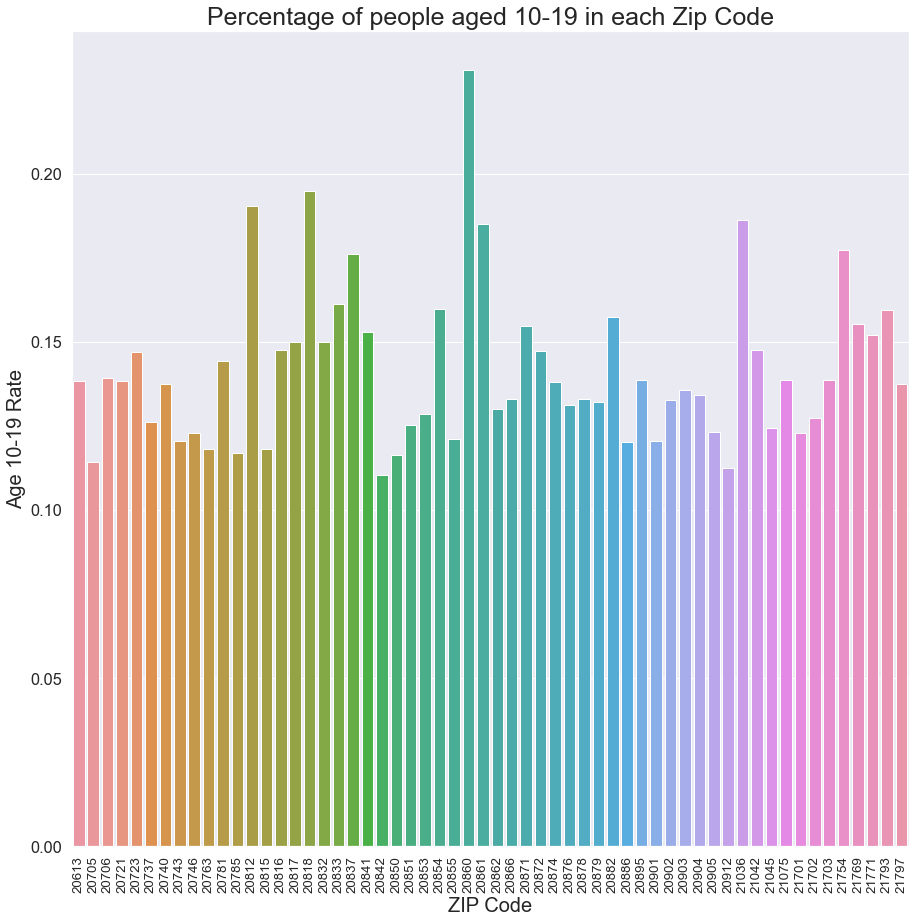

In [212]:
# Bar graph showing the 10-19 rate

ZIP_FINAL_HIGH = ZIP_FINAL.loc[ZIP_FINAL['10-19_Rate'] >= 0.11]
sns.set(rc = {'figure.figsize': (15,15)})
sns.barplot(x= 'ZIP_Code', y = '10-19_Rate', data = ZIP_FINAL_HIGH, ci = None)
plt.xticks(rotation = 90, fontsize = 13.3)
plt.yticks(fontsize = 1)
plt.title('Percentage of people aged 10-19 in each Zip Code', fontsize = 25)
plt.ylabel('Age 10-19 Rate', fontsize = 20)
plt.xlabel('ZIP Code', fontsize = 20)
plt.show()

In [213]:
# Selecting ZIP Codes which had high suicidal incident rates

common_ZIP = ZIP_FINAL[(ZIP_FINAL.ZIP_Code  == 20850) | (ZIP_FINAL.ZIP_Code == 20879) | (ZIP_FINAL.ZIP_Code == 20861) | (ZIP_FINAL.ZIP_Code == 20833)]
common_ZIP = common_ZIP[['ZIP_Code', 'Suicidal_Incident_Rate', '10-19_Rate']]
common_ZIP.head()

,ZIP_Code,Suicidal_Incident_Rate,10-19_Rate
58,20833,0.00012928,0.16132890
59,20833,0.00646412,0.16132890
60,20833,0.00012928,0.16132890
61,20833,0.00038785,0.16132890
62,20833,0.00012928,0.16132890


In [185]:
common_ZIP_grouped = common_ZIP.groupby(['ZIP_Code']).mean()
common_ZIP_grouped["10-19_Rate"] = common_ZIP_grouped['10-19_Rate'] / 100
common_ZIP_grouped.head(8)

,Suicidal_Incident_Rate,10-19_Rate
ZIP_Code,,
20833,0.00124973,0.00161329
20850,0.00136491,0.00116494
20861,0.00181333,0.00185205
20879,0.00163177,0.00132110


<AxesSubplot:ylabel='ZIP_Code'>

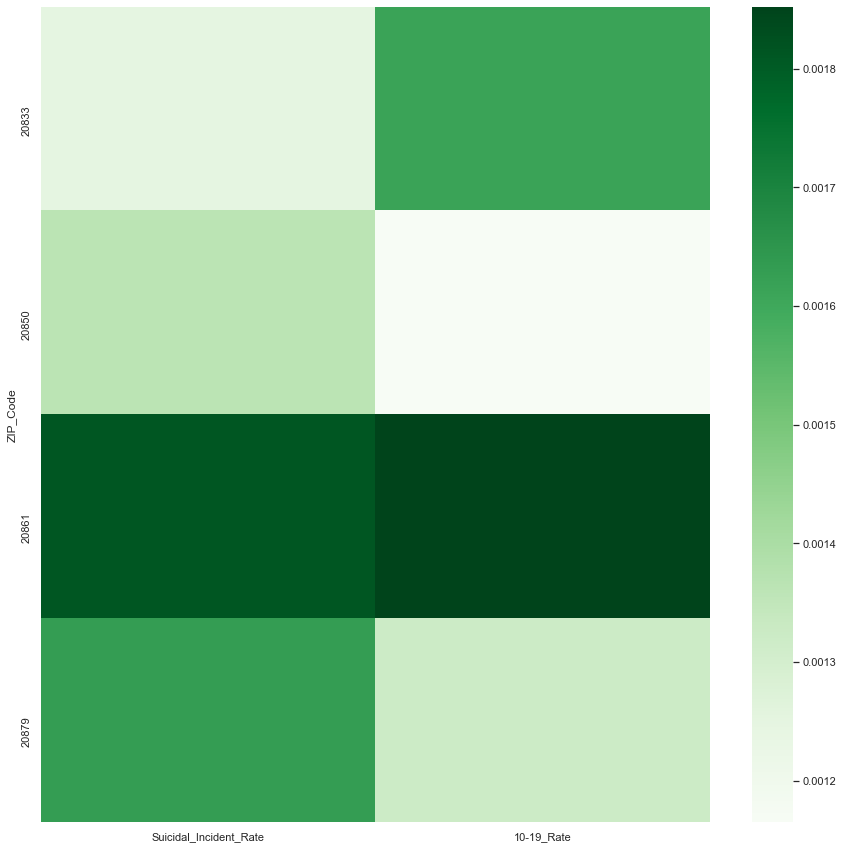

In [190]:
# Heatmap comparing the suicidal incident rate and 10-19 rate

sns.heatmap(common_ZIP_grouped, cmap = "Greens", fmt='d')